In [1]:
# Importing Libraries...
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset..
df_comp_data=pd.read_csv('Company Stock and Investment.csv',parse_dates=['Date'])
df_comp_data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
# Displaying few rows...
df_comp_data.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793
1983,2017-11-15,-0.007006,0.005963,-0.013190,-0.008928


In [4]:
# chechking the features,duplicate values and nan values in the Datasets

print("\nFeatures/Columns : \n", df_comp_data.columns)
print("\n\nNumber of Features/Columns : ", len(df_comp_data.columns))
print("\nNumber of Rows : ",len(df_comp_data))
print("\n\nData Types :\n", df_comp_data.dtypes)
print("sum of duplicated values{}\n".format(df_comp_data.duplicated().sum()))
print("\nContains NaN/Empty cells : ", df_comp_data.isnull().values.any())
print("\nTotal empty cells by column :\n", df_comp_data.isnull().sum(),"\n\n")


Features/Columns : 
 Index(['Date', 'Oil Investments', 'Gold Investments', 'Comp Stock',
       'Other sharesInvestments'],
      dtype='object')


Number of Features/Columns :  5

Number of Rows :  1984


Data Types :
 Date                       datetime64[ns]
Oil Investments                   float64
Gold Investments                  float64
Comp Stock                        float64
Other sharesInvestments           float64
dtype: object
sum of duplicated values0


Contains NaN/Empty cells :  False

Total empty cells by column :
 Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64 




In [5]:
# Making a DataFrame consisting of 'Date' as index and only Comp Stocks data as a single feature...
df_comp_stock=pd.DataFrame({'Date':df_comp_data['Date'],'Comp Stock':df_comp_data['Comp Stock']},)
df_comp_stock.set_index('Date',inplace=True)
df_comp_stock

,Comp Stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849
...,...
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008


In [6]:
# Getting Stastistical information...
df_comp_stock.describe()

,Comp Stock
count,1984.000000
mean,0.001007
std,0.016017
min,-0.123558
25%,-0.006926
50%,0.000876
75%,0.009708
max,0.088741


## Step 2: Visualize the Data

Text(0.5, 1.0, 'Comp Stocks Per Year ')

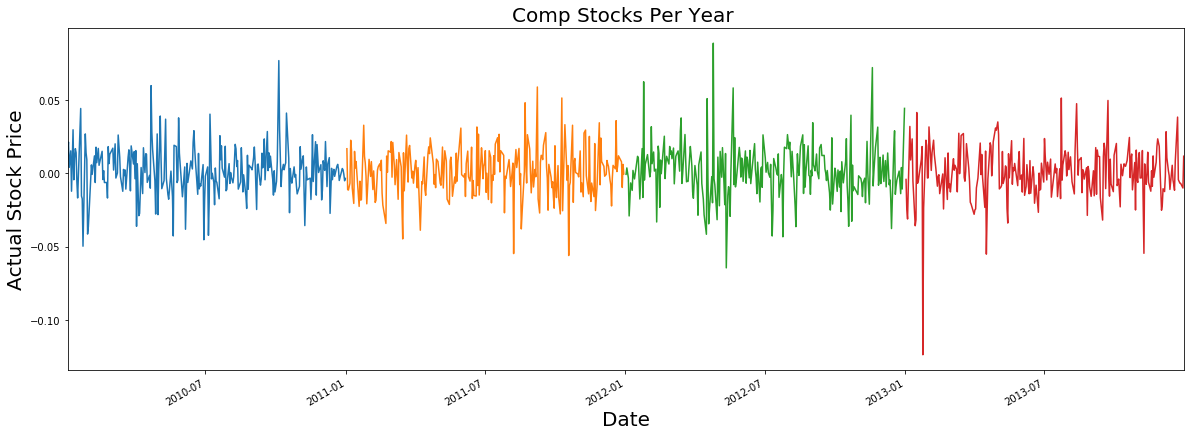

In [7]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(for year 2010 -2013)...
plt.subplots(figsize=(20,7))
df_comp_stock.loc['2010', 'Comp Stock'].plot()
df_comp_stock.loc['2011', 'Comp Stock'].plot()
df_comp_stock.loc['2012', 'Comp Stock'].plot()
df_comp_stock.loc['2013', 'Comp Stock'].plot()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.title("Comp Stocks Per Year ",fontsize=20)

Text(0.5, 1.0, 'Comp Stocks Per Year ')

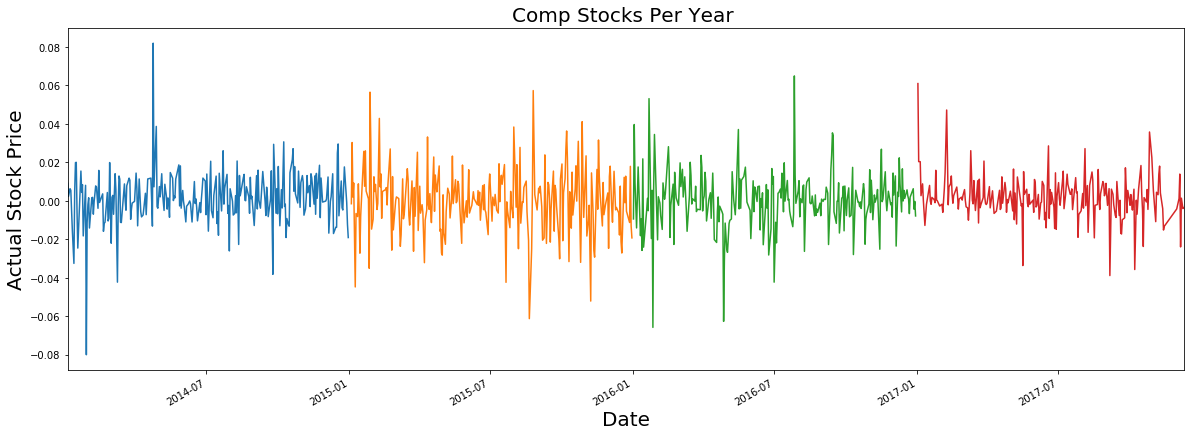

In [8]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(2014 -2017)...
plt.subplots(figsize=(20,7))
df_comp_stock.loc['2014', 'Comp Stock'].plot()
df_comp_stock.loc['2015', 'Comp Stock'].plot()
df_comp_stock.loc['2016', 'Comp Stock'].plot()
df_comp_stock.loc['2017', 'Comp Stock'].plot()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.title("Comp Stocks Per Year ",fontsize=20)

### In above plot data looks like seasonal data. Now we will check if data is stationary or not

In [9]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df_comp_stock['Comp Stock']) # adfuller give us 5 values

In [10]:
# showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-12.473386265908244, 3.207774293089883e-23, 12, 1971, {'1%': -3.4336720887549483, '5%': -2.863007508094813, '10%': -2.567551240570721}, -10649.854659769328)


### Most important value is p-value above

In [11]:
#Ho: It is non stationary
#H1: It is stationary
### Testing For Stationarity

def adfuller_test(data):
    result=adfuller(data) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [12]:
# Printing adfuller values..
adfuller_test(df_comp_stock['Comp Stock'])

ADF Test Statistic : -12.473386265908244
p-value : 3.207774293089883e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


**As p value is less then .05 we are going to reject the null hypothesis-- Stationary**

Text(0.5, 1.0, 'Loess Smoothed 15% ')

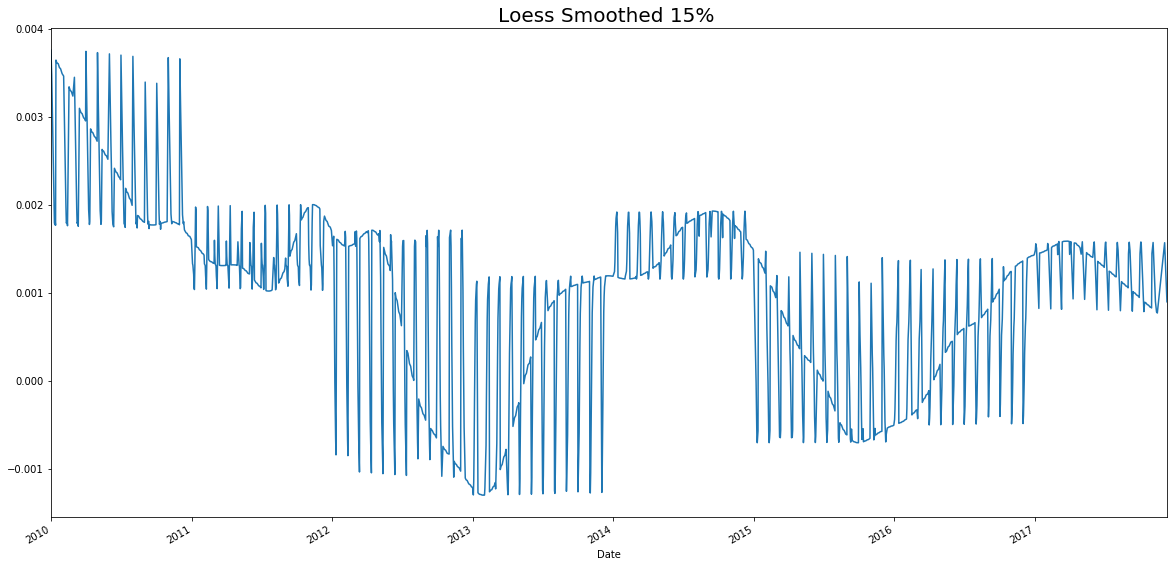

In [13]:
# Smooth graph for the Comp Stock data...
from statsmodels.nonparametric.smoothers_lowess import lowess
df_smooth_15 = pd.DataFrame(lowess(df_comp_stock['Comp Stock'], np.arange(len(df_comp_stock['Comp Stock'])), frac=0.15)[:, 1], index=df_comp_stock.index, columns=['Comp Stock'])
df_smooth_15['Comp Stock'].plot(figsize=(20,10))
plt.title("Loess Smoothed 15% ",fontsize=20)

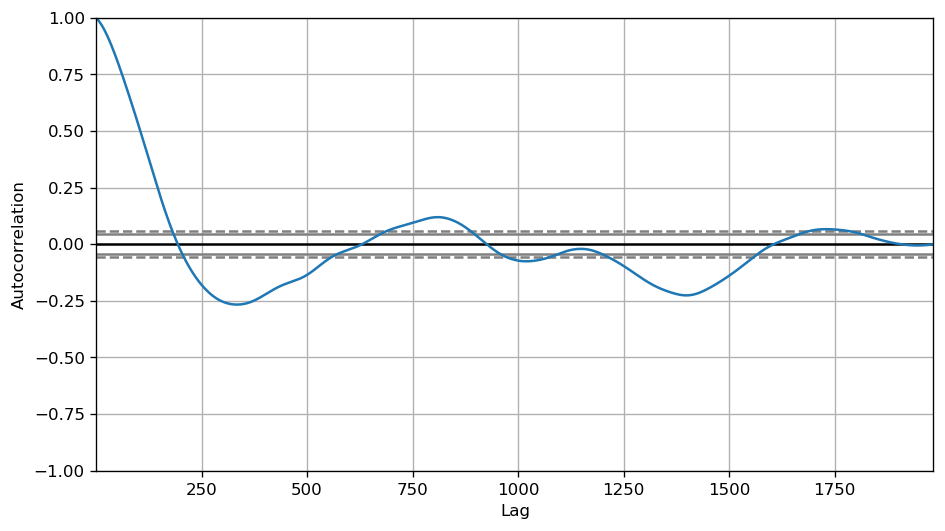

In [14]:
# plotting the correlation plot for the smooth data..
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df_smooth_15['Comp Stock'])

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


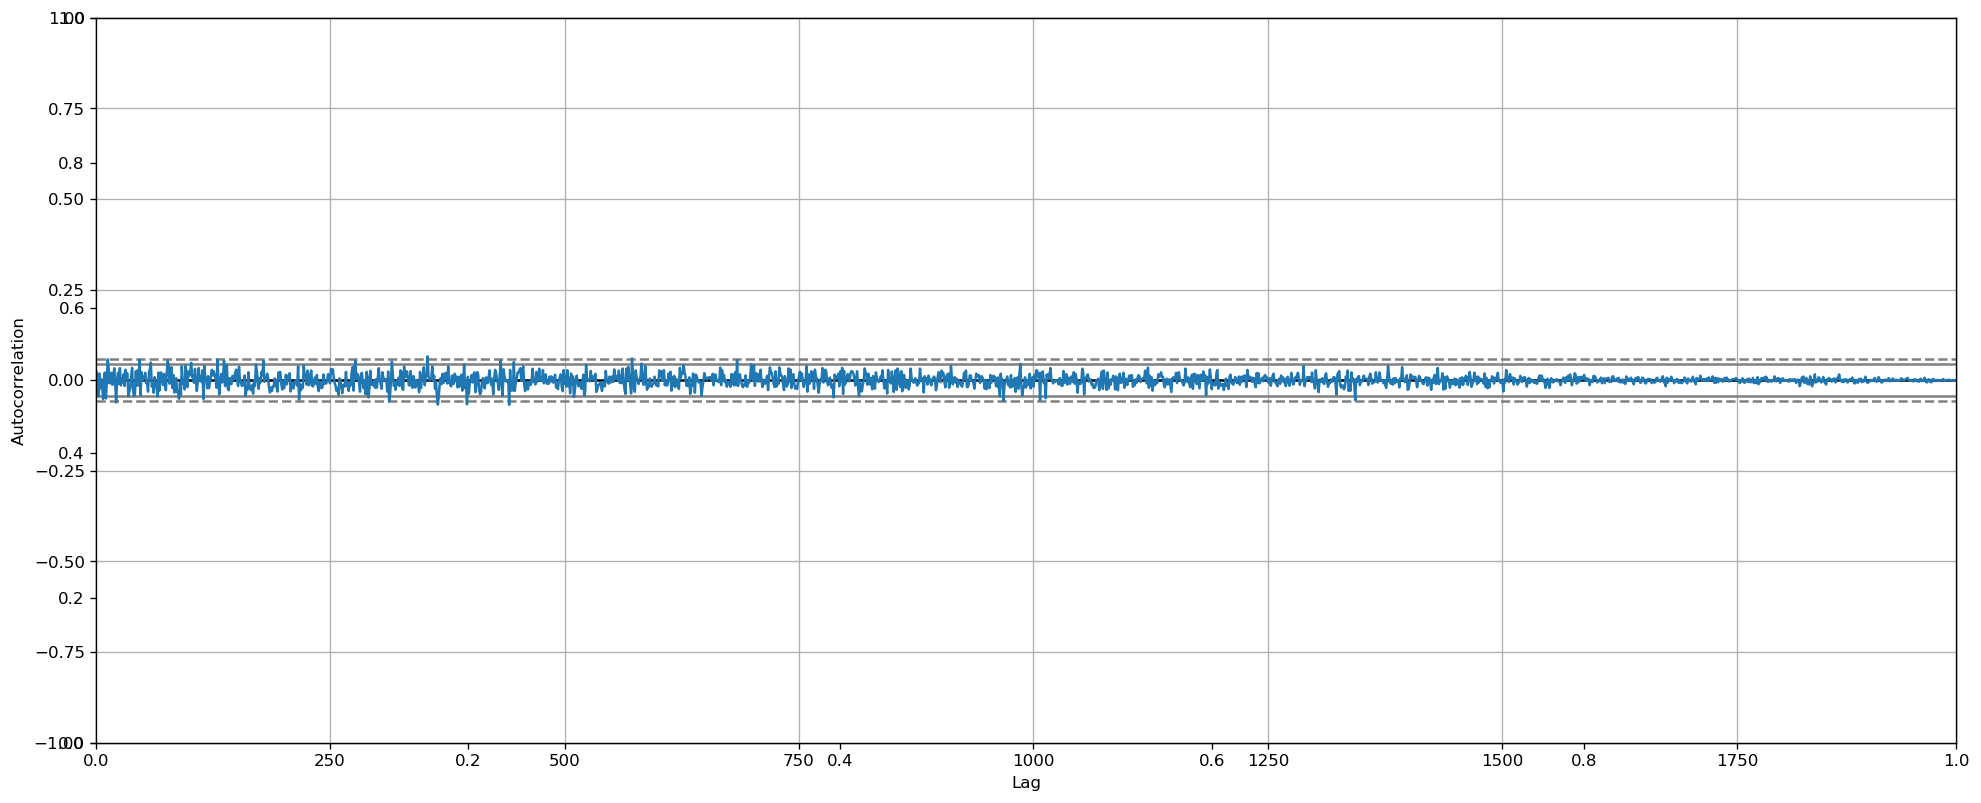

In [15]:
# plotting the correlation plot for the actual data..
from pandas.plotting import autocorrelation_plot
plt.subplots(figsize=(20,8))
autocorrelation_plot(df_comp_stock['Comp Stock'])
plt.show()


**In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:**

**1) p – The lag value where the PACF chart crosses the upper confidence interval for the first time.**              
**2) q – The lag value where the ACF chart crosses the upper confidence interval for the first time.**            

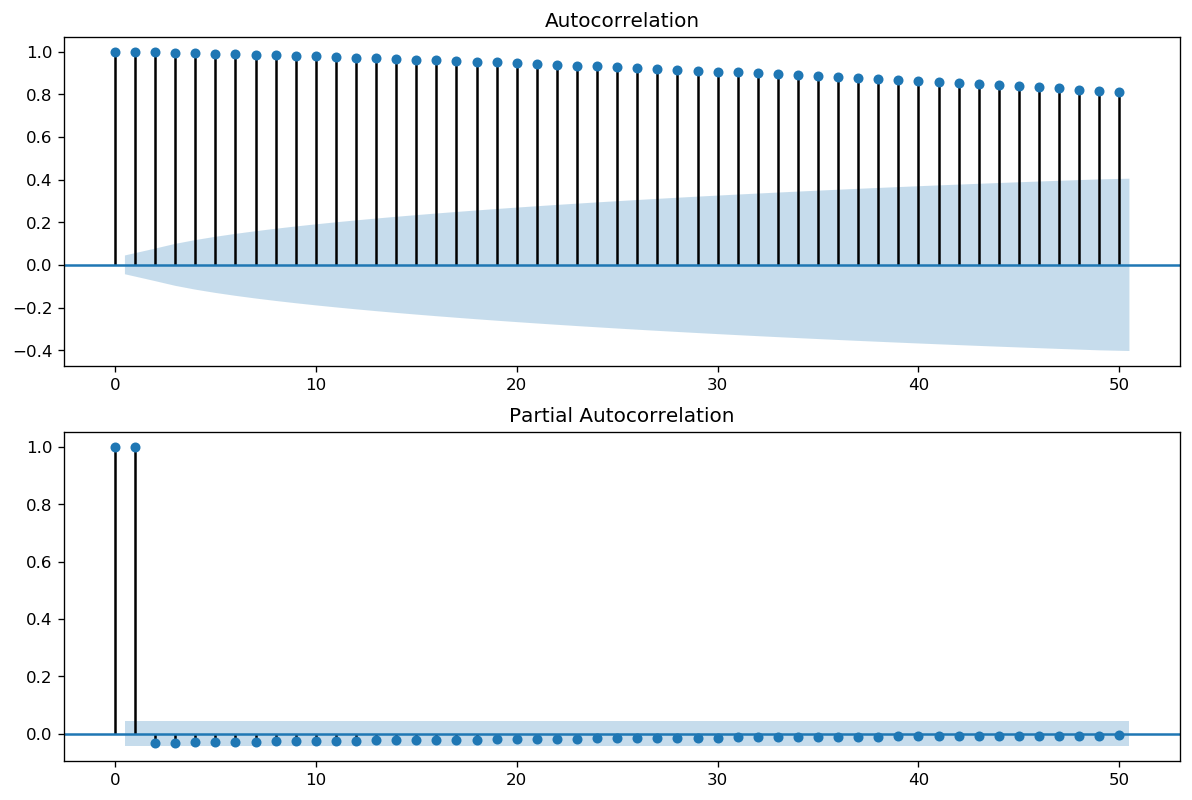

In [16]:
# Plotting autocorreltion plot partial autocorreltion plot for the smooth data
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_smooth_15['Comp Stock'].iloc[1:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_smooth_15['Comp Stock'].iloc[1:],lags=50,ax=ax2)

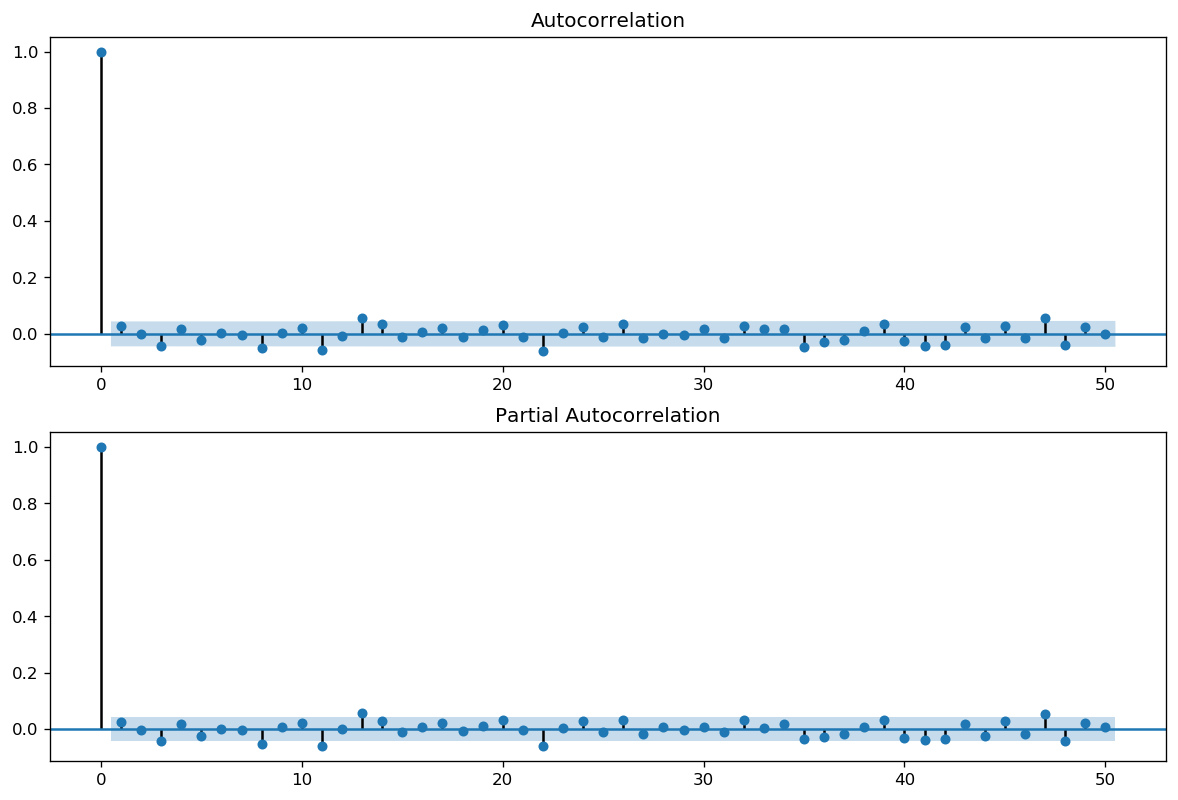

In [17]:
# Plotting autocorreltion plot partial autocorreltion plot  for the actual data..
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_comp_stock['Comp Stock'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_comp_stock['Comp Stock'].iloc[13:],lags=50,ax=ax2)

**Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself.**

**Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.**    

In [18]:
# Create Training and validation sets of the actual data..
train = df_comp_stock['Comp Stock'][:1512]
validation=df_comp_stock['Comp Stock'][1513:1986]


### Plotting ACF and PACF graphs will get us p and q values and d=0 as the data is stationary but above ACF and PACf graphs are not giveing a clear picture thus using Auto-ARIMA.
### In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In [19]:
# using Auto arima to find the best model with best parameter value
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True, # don't want convergence warnings
                         stepwise=True) # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=14.08 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-6959.616, Time=0.49 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-7405.583, Time=4.88 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-6961.607, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-6958.031, Time=0.75 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-7539.145, Time=14.81 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=28.48 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.31 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-7539.783, Time=7.48 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-7407.040, Time=3.05 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=22.50 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=9.92 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-7539.170, Time=16.01 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept 

In [20]:
# printing model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1512
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                3773.836
Date:                  Sun, 01 Nov 2020   AIC                          -7541.672
Time:                          19:03:08   BIC                          -7525.732
Sample:                               0   HQIC                         -7535.734
                                 - 1512                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6536      0.021    -31.546      0.000      -0.694      -0.613
ar.S.L24      -0.2930      0.020    -14.398      0.000      -0.333      -0.253
sigma2         0.0004   9.34e-06     40.726      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                      211.21   Jarque-Bera (JB):               371.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.11
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Testing

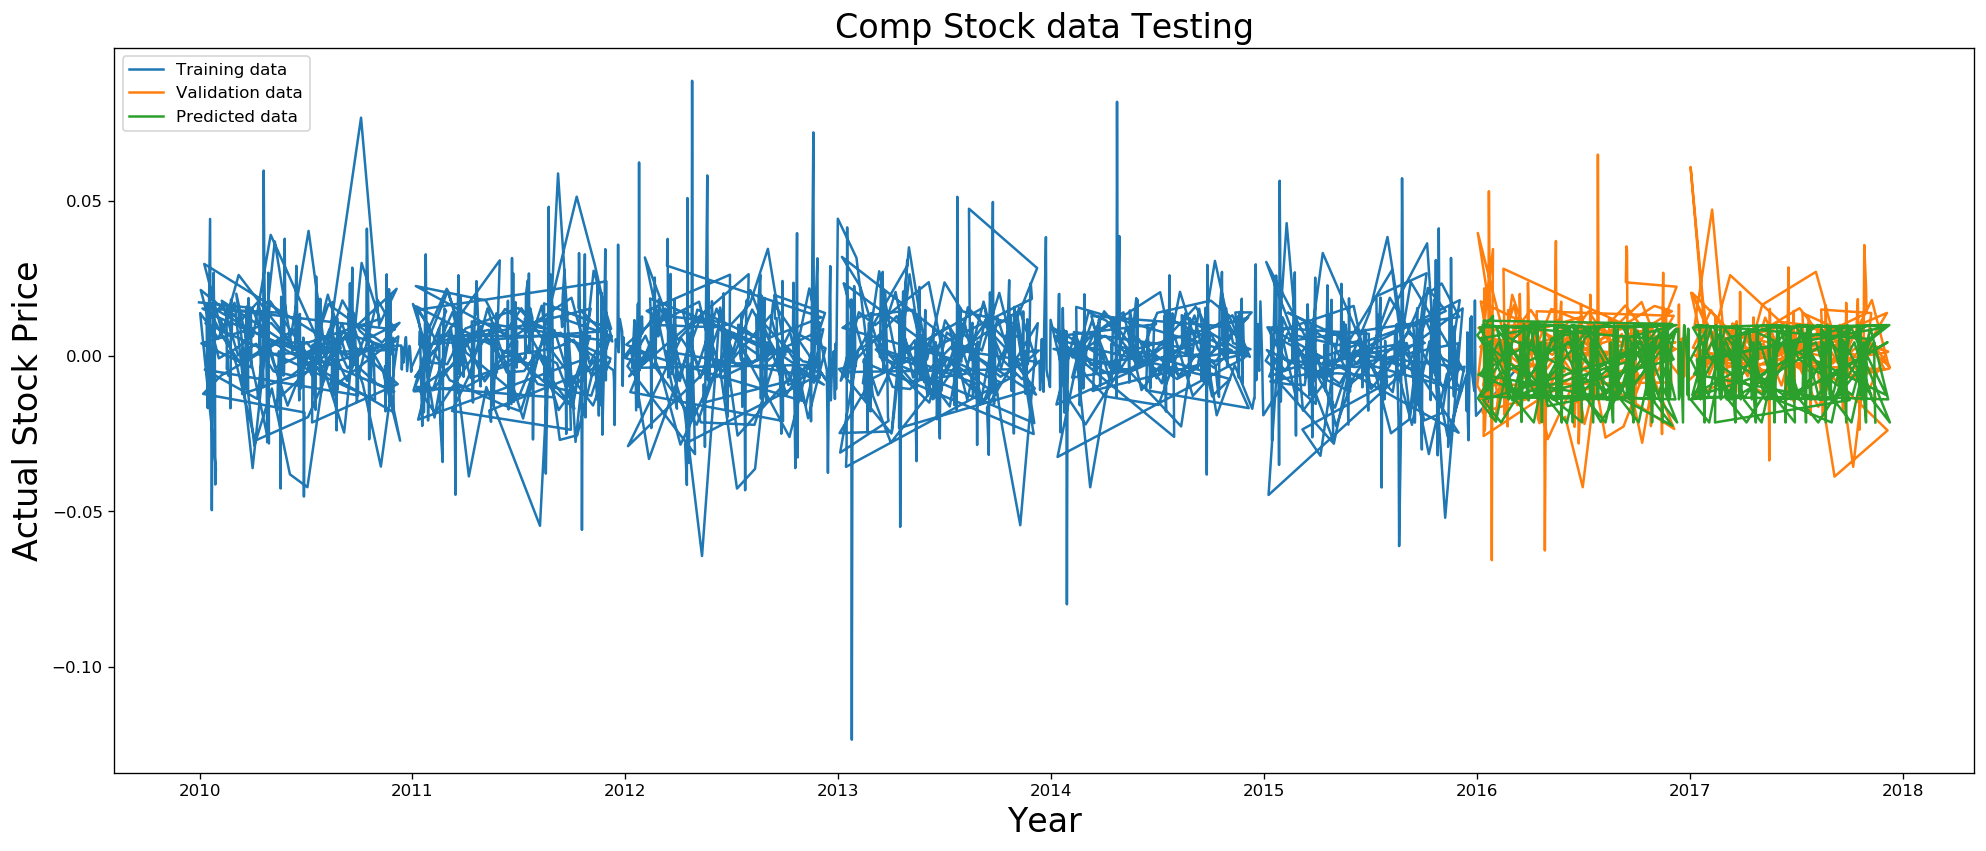

In [21]:
# Forecasting the model over validation data i.e 2017 and 2018

validated_data = model.predict(n_periods=len(validation))
validated_df = pd.DataFrame(validated_data,index = validation.index,columns=['Prediction'])

#plot the predictions for validation set
plt.subplots(figsize=(20,8))
plt.plot(train, label='Training data')
plt.plot(validation, label='Validation data')
plt.plot(validated_df, label='Predicted data')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.legend(loc='upper left', fontsize=10)
plt.title("Comp Stock data Testing", fontsize=20)
plt.show()

In [22]:
# Displaying the predicted data
validated_df.head(10)

,Prediction
Date,
2016-06-01,0.002509
2016-07-01,-0.011253
2016-08-01,-0.021193
2016-11-01,0.005698
2016-12-01,0.010407
2016-01-13,0.011465
2016-01-14,0.001720
2016-01-15,-0.010557
2016-01-19,0.004135


In [23]:
# Saving the data in a dataframe..
validated_df["Previous"]=df_comp_stock["Comp Stock"]
validated_df.head(10)

,Prediction,Previous
Date,,
2016-06-01,0.002509,-0.019570
2016-07-01,-0.011253,-0.042205
2016-08-01,-0.021193,0.005288
2016-11-01,0.005698,0.016192
2016-12-01,0.010407,0.014513
2016-01-13,0.011465,-0.025710
2016-01-14,0.001720,0.021871
2016-01-15,-0.010557,-0.024015
2016-01-19,0.004135,-0.004839


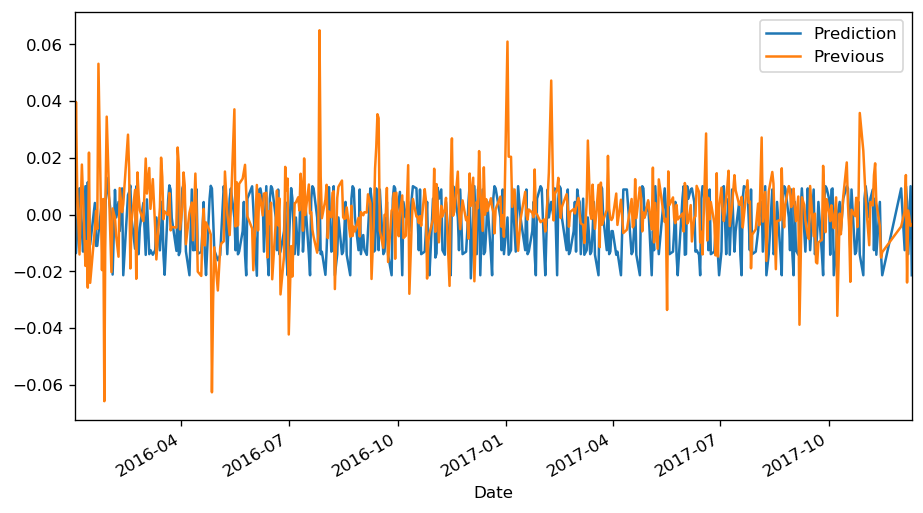

In [24]:
# Plotting Previous and predicted values...
validated_df.plot()

In [25]:
# Printing Errors..
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(validation, validated_data)
print('MSE(Mean Squarred Error): '+str(mse))
mae = mean_absolute_error(validation, validated_data)
print('MAE(Mean Absolute Error): '+str(mae))
rmse = np.sqrt(mean_squared_error(validation, validated_data))
print('RMSE(Root Mean Squared Error): '+str(rmse))

MSE(Mean Squarred Error): 0.00030875864700328126
MAE(Mean Absolute Error): 0.014068197152353128
RMSE(Root Mean Squared Error): 0.017571529444054698


## Forecasting

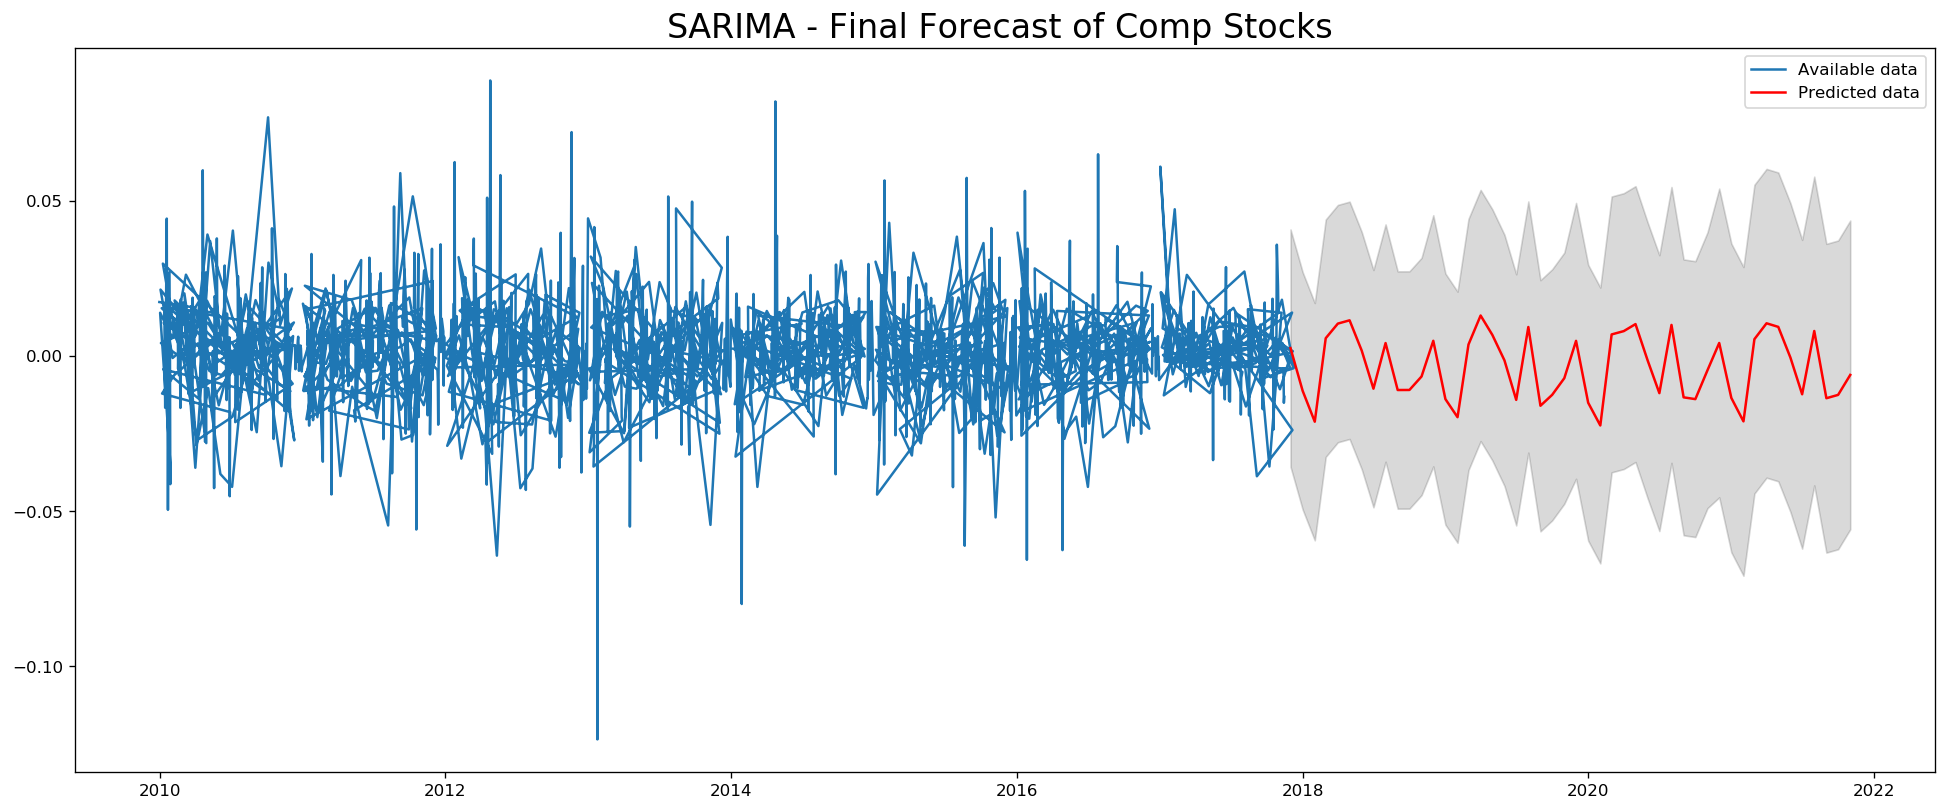

In [27]:
# Forecasting the model over the 2018 -2021 years..

fitted, confint = model.predict(n_periods=48, return_conf_int=True)
index_of_fc = pd.date_range(validation.index[-1], periods = 48, freq='MS')

# make series for plotting purpose
forecast_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.subplots(figsize=(20,8))
plt.plot(df_comp_stock,label='Available data')
plt.plot(forecast_series, color='red',label='Predicted data')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend()
plt.title("SARIMA - Final Forecast of Comp Stocks ",fontsize=20)
plt.show()

In [28]:
# Displaying the forecasted data..
forecast_series

2017-12-01    0.002509
2018-01-01   -0.011253
2018-02-01   -0.021193
2018-03-01    0.005698
2018-04-01    0.010407
2018-05-01    0.011465
2018-06-01    0.001720
2018-07-01   -0.010557
2018-08-01    0.004135
2018-09-01   -0.010992
2018-10-01   -0.010975
2018-11-01   -0.006629
2018-12-01    0.004861
2019-01-01   -0.013919
2019-02-01   -0.019749
2019-03-01    0.003673
2019-04-01    0.013011
2019-05-01    0.006766
2019-06-01   -0.001453
2019-07-01   -0.014164
2019-08-01    0.009307
2019-09-01   -0.016058
2019-10-01   -0.012535
2019-11-01   -0.007172
2019-12-01    0.004843
2020-01-01   -0.015090
2020-02-01   -0.022415
2020-03-01    0.006920
2020-04-01    0.007987
2020-05-01    0.010249
2020-06-01   -0.001448
2020-07-01   -0.011995
2020-08-01    0.009982
2020-09-01   -0.013353
2020-10-01   -0.013924
2020-11-01   -0.004624
2020-12-01    0.004166
2021-01-01   -0.013543
2021-02-01   -0.021096
2021-03-01    0.005391
2021-04-01    0.010507
2021-05-01    0.009349
2021-06-01   -0.000522
2021-07-01 

In [29]:
# Creating a dataframe for the forecasted data..
forecast_series_df = pd.DataFrame(forecast_series,columns=["Comp_Stock_Predictions"]) 
forecast_series_df.index.name="Date"
forecast_series_df

,Comp_Stock_Predictions
Date,
2017-12-01,0.002509
2018-01-01,-0.011253
2018-02-01,-0.021193
2018-03-01,0.005698
2018-04-01,0.010407
2018-05-01,0.011465
2018-06-01,0.001720
2018-07-01,-0.010557
2018-08-01,0.004135


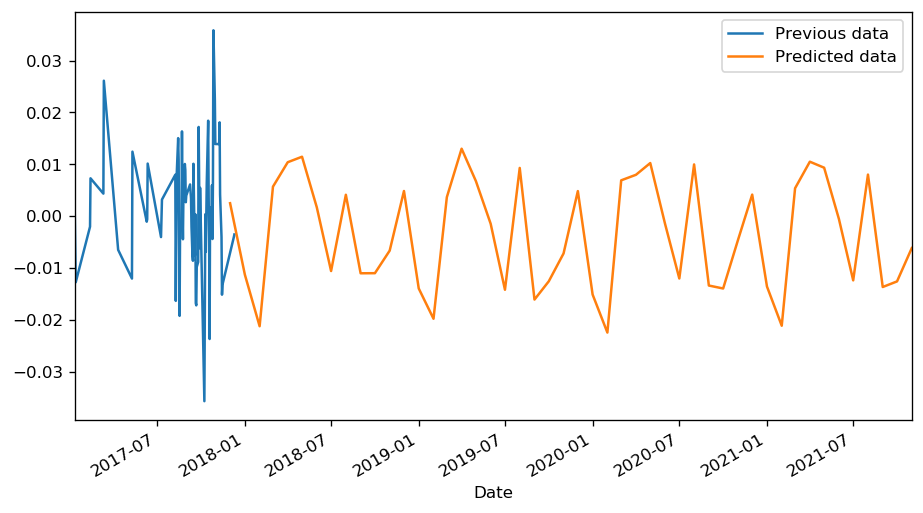

In [30]:
# Plotting the forecasted values..
validation[400:471].plot(label='Previous data')
forecast_series.plot(label='Predicted data')
plt.legend()

In [31]:
#Save the predicted values into a excel file
forecast_series_df.to_excel("Comp_Stock_Predictions.xlsx")

# Conclusion (According to the 2018-2021 forecast i.e 4 years):

>> 1) In 2021 the values of stocks is a bit more as compared to previous years stocks(2018,2019,2020).    
>> 2) Comp Stock value increases in month (march to april) in year 2018 and 2019 and  for year 2020 and 2021 the comp stocks increases in the months (march to may).                
>> 3) Comp Stocks values will decreases in (November,2020 to February,2021 ) , (June,2021 to July,2021) ,()August,2021 to September,2021).     
>> 4) Overall forecasted years(2018-2021) comp stock values are less as compared to the training data from(2009-2017).  

# End of the document